# **Glovo Interview**
## DATA ANALYST position

##Problem: Business Case

## Author: Rocio Soledad Radulescu
-------------------------------------
## A. Based on the data you were given, provide visibility over the following metrics:

 

1. Customer Delivery Time. How long the customer waited for the order.
2. Delivery Distance. Total distance traveled by the couriers.
3. Reassignment Probability (whenever we need to assign an order to another courier after the first assignment it counts as a reassignment).


In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [56]:
df = pd.read_excel("/content/Finance Data Analyst test.xlsx")
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,...,courier_enters_delivery_point_time_local,termination_time,Count,Total Time,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,53134335.0,DeliveredStatus,85260.0,18579597.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,6.029,...,2019-07-13 13:46:58,2019-07-13 13:59:49,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN
1,53009545.0,DeliveredStatus,23517.0,11871195.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,3.998,...,2019-07-12 20:37:53,2019-07-12 20:43:01,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN
2,53129297.0,DeliveredStatus,18300.0,1053786.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,5.309,...,2019-07-13 12:55:16,2019-07-13 12:59:23,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN
3,53235752.0,CanceledStatus,85260.0,20466508.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,6.429,...,NaT,2019-07-13 22:25:15,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN
4,53002671.0,DeliveredStatus,15912.0,16549489.0,20153483.0,WALL - Partner,1.0,BICYCLE,1.0,3.442,...,2019-07-12 20:07:08,2019-07-12 20:10:37,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN


##Cleaning

In [57]:
# count row
len(df)

2473

In [58]:
#show null data
df.isna().sum().sort_values()

Total Time                                     0
id                                             2
termination_time                               2
last_courier_assigned_time                     2
activation_time_local                          2
total_real_distance                            2
number_of_assignments                          2
courier_started_order_local                    2
is_food                                        2
vertical                                       2
courier_id                                     2
customer_id                                    2
final_status                                   2
transport                                      2
store_address_id                              33
courier_enters_pickup_time_local              63
pickup_time_local                             63
courier_enters_delivery_point_time_local      69
Unnamed: 24                                 2472
Count                                       2473
Unnamed: 23         

In [59]:
# I observe many empty columns and 2 empty rows - I delete them
df = df.drop(labels=['Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Count'], axis=1)
df.dropna(subset=["transport"], inplace=True) 
df.isna().sum().sort_values()

id                                           0
courier_started_order_local                  0
last_courier_assigned_time                   0
activation_time_local                        0
total_real_distance                          0
termination_time                             0
transport                                    0
number_of_assignments                        0
vertical                                     0
courier_id                                   0
customer_id                                  0
final_status                                 0
is_food                                      0
Total Time                                   0
store_address_id                            31
courier_enters_pickup_time_local            61
pickup_time_local                           61
courier_enters_delivery_point_time_local    67
dtype: int64

### Customer Delivery Time. How long the customer waited for the order.
Termination time - Activation Time

In [60]:
# first we look for type and  wrong data
df.groupby('activation_time_local').size()

activation_time_local
2019-07-08 00:35:09    1
2019-07-08 00:36:20    1
2019-07-08 00:36:47    1
2019-07-08 10:16:48    1
2019-07-08 10:33:39    1
                      ..
2019-07-14 23:34:18    1
2019-07-14 23:35:45    1
2019-07-14 23:46:47    1
2019-07-14 23:47:12    1
2019-07-14 23:55:35    1
Length: 2374, dtype: int64

In [61]:
df.groupby('termination_time').size()

termination_time
2019-07-08 00:50:20    1
2019-07-08 01:00:09    1
2019-07-08 01:04:41    1
2019-07-08 10:36:01    1
2019-07-08 11:04:34    1
                      ..
2019-07-14 23:57:28    1
2019-07-14 23:58:16    1
2019-07-15 00:21:19    1
2019-07-15 00:23:44    1
2019-07-15 00:40:39    1
Length: 2457, dtype: int64

In [62]:
# subtract termination order and activation time to get delivery time
df['delivery_time'] =  df['termination_time'] - df['activation_time_local'] 
df['delivery_time']

0      0 days 00:55:05
1      0 days 00:36:32
2      0 days 00:44:25
3      0 days 00:29:17
4      0 days 00:30:24
             ...      
2466   0 days 01:27:33
2467   0 days 00:34:03
2468   0 days 00:31:30
2469   0 days 00:27:03
2470   0 days 00:48:27
Name: delivery_time, Length: 2471, dtype: timedelta64[ns]

###Delivery Distance. Total distance traveled by the couriers.
total_real_distance is the real distance in KM the courier did to
deliver the order.

In [63]:
# check the date in the column
df.groupby('total_real_distance').size()
# shortest distance is 0.7 km and longest distance 19.7 km

total_real_distance
0.708     1
0.710     1
0.775     1
0.800     2
0.801     1
         ..
16.527    1
16.955    1
17.363    1
17.887    1
19.789    1
Length: 2080, dtype: int64

In [64]:
# If we need to know total distance by courier
df_total_distance_courier = df.groupby(['courier_id'])['total_real_distance'].sum()
df_total_distance_courier

courier_id
2044461.0     156.868
2064107.0       6.550
2146758.0     268.575
2234219.0     215.449
4055620.0     330.234
               ...   
20153190.0    112.390
20153481.0     93.919
20153483.0     38.723
20451102.0      8.701
20550754.0     10.595
Name: total_real_distance, Length: 83, dtype: float64

### Reassignment Probability (whenever we need to assign an order to another courier after the first assignment it counts as a reassignment).


In [65]:
# create pivot for reassignment orders
df['reassignment'] = np.where(df['number_of_assignments'] > 1, 1, 0)
df.groupby(['reassignment']).size()

reassignment
0    2129
1     342
dtype: int64

In [66]:
# I set new vars with total rows with 1 (reassignment) and total with 0 (not_reassignment)
reass_value=len(df[(df['reassignment']==1)])
not_reass_value=len(df[(df['reassignment']==0)])

print("Reassignment Probability: ", reass_value*100/not_reass_value)

Reassignment Probability:  16.063879755753874


-----------------

## B. Regarding reassignments can you see any trends / correlation between this metric and any of the dimensions in the dataset?


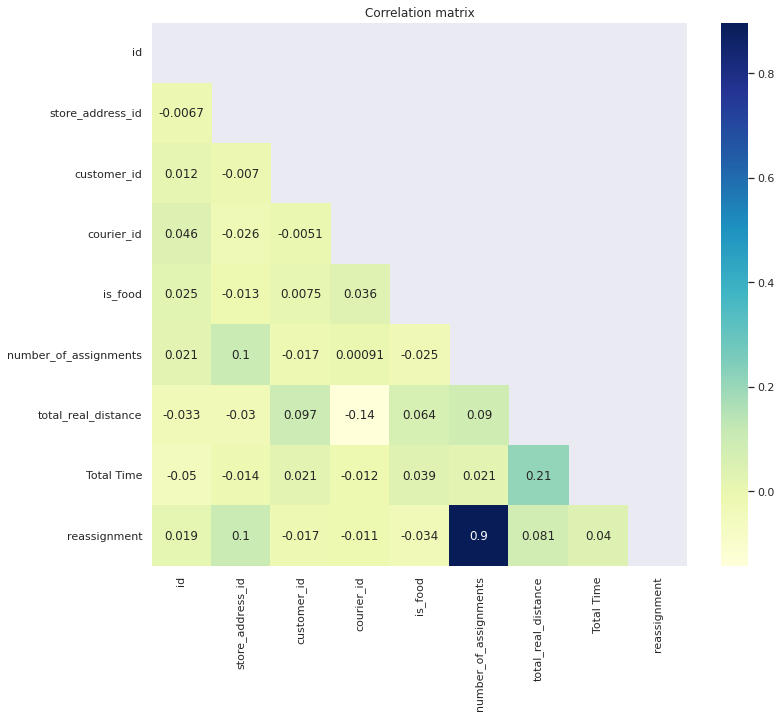

In [67]:
corr= df.corr()
# get correlation of different int att
matrix = np.triu(corr)
plt.figure(figsize = (12,10))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=matrix,annot=True, cmap="YlGnBu")

In this matrix we can see correlation between the new column reassignment and store_adress_id and total_real_distance. 

maybe some couriers avoid some stores or distances in orders.

-----------------

## C. Once the courier arrives at the store, the time until the order is picked-up (waiting_time_at_pickup), can present high variation. With the data given, present an analysis showcasing this. Can you identify any clear trends in terms of worst offenders? What could be the possible causes when the courier is waiting for a very long time before picking up the order?

In [68]:
# first I clean empty rows (could be doing something different like replace or do dummies vars)
df.dropna(subset=["pickup_time_local"], inplace=True) # rows empty in pickup_time and courier_enters are the same

# get waiting time
df['waiting_time_at_pickup'] = df['pickup_time_local'] - df['courier_enters_pickup_time_local']
df.sort_values(by=['waiting_time_at_pickup'], inplace=True, ascending=False)
print(df)

              id     final_status  store_address_id  customer_id  courier_id  \
787   52683223.0  DeliveredStatus           18300.0   20417733.0  16974425.0   
1674  52527816.0  DeliveredStatus           18300.0    2194998.0   6212245.0   
2156  52685562.0  DeliveredStatus           18300.0    6026556.0  18225430.0   
1160  52672108.0  DeliveredStatus           18300.0   11743615.0  18830660.0   
1942  52697750.0  DeliveredStatus           30640.0   10998682.0  18225711.0   
...          ...              ...               ...          ...         ...   
1210  52788873.0  DeliveredStatus           85260.0    5389187.0  14117081.0   
831   52842189.0  DeliveredStatus           34476.0   14918928.0  16327386.0   
1188  53021058.0  DeliveredStatus           18300.0    2563157.0  14117081.0   
1411  53181340.0  DeliveredStatus               NaN   16335546.0   9128251.0   
119   52965111.0  DeliveredStatus           17997.0   11404000.0  14917583.0   

               vertical  is_food  trans

In [69]:
# type of transport could be a limitation in waiting time at pickup.
df.groupby('transport')['waiting_time_at_pickup'].mean()

transport
BICYCLE     0 days 00:16:42.078542510
CAR         0 days 00:14:31.110294117
MOTORBIKE   0 days 00:13:17.063885267
Name: waiting_time_at_pickup, dtype: timedelta64[ns]

In [70]:
# if the package is food, could be need more preparation
df.groupby('is_food')['waiting_time_at_pickup'].mean()

is_food
0.0   0 days 00:09:54.362318840
1.0   0 days 00:15:24.099530115
Name: waiting_time_at_pickup, dtype: timedelta64[ns]